In [45]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
#Inspección del conjunto de datos de entrada
music = pd.read_csv('/home/features_30_sec.csv')
music = music.drop(columns=['harmony_mean','harmony_var','perceptr_mean','perceptr_var'])
print(len(list(music.columns))-3)

53


In [3]:
music_label = music.values[:,-1]
music_features = music.values[:,2:-1]
music_index = music.values[:,0:1]

#Se pegan la etiqueta y el nombre de la canción
music_label = np.concatenate((music_label.reshape(1000,1),music_index.reshape(1000,1)), axis=1)
print(music_label[0:4,:])

[['blues' 'blues.00000.wav']
 ['blues' 'blues.00001.wav']
 ['blues' 'blues.00002.wav']
 ['blues' 'blues.00003.wav']]


In [4]:

X_train, X_val_test, y_train, y_val_test = train_test_split(music_features, music_label, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=42)


In [9]:
music_Regression = clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs',penalty='l2', C=1.0, max_iter=1000)
#Metodo de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
#Evaluar el modelo
n_scores = cross_val_score(music_Regression, X_train, y_train[:,0], scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.376 (0.041)


In [10]:
music_Regression.fit(X_train, y_train[:,0])
out_val = music_Regression.predict(X_val)
print(out_val[:5])
print(y_val[:5,0])

['disco' 'metal' 'hiphop' 'reggae' 'metal']
['hiphop' 'metal' 'pop' 'rock' 'rock']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
unique, counts = np.unique(out_val, return_counts=True)
dict(zip(unique, counts))

{'blues': 13,
 'classical': 9,
 'country': 5,
 'disco': 12,
 'hiphop': 4,
 'jazz': 8,
 'metal': 25,
 'pop': 9,
 'reggae': 7,
 'rock': 8}

In [12]:
unique, counts = np.unique(y_val[:,0], return_counts=True)
dict(zip(unique, counts))

{'blues': 7,
 'classical': 7,
 'country': 11,
 'disco': 8,
 'hiphop': 9,
 'jazz': 16,
 'metal': 13,
 'pop': 5,
 'reggae': 12,
 'rock': 12}

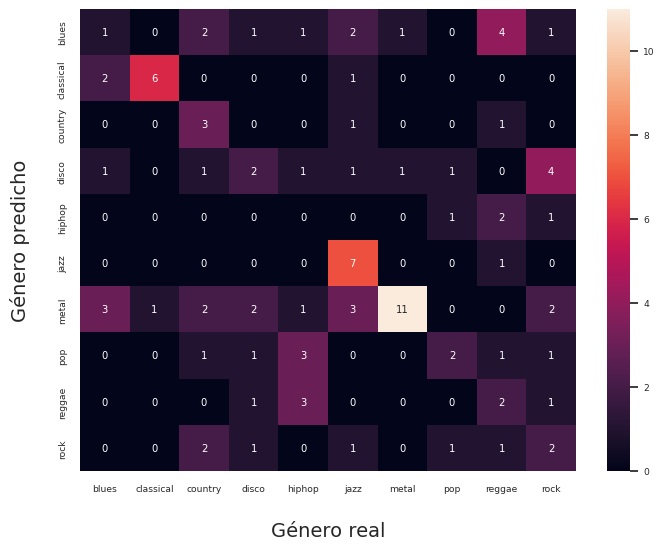

In [13]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

In [14]:
print(classification_report(y_val[:,0], out_val))

              precision    recall  f1-score   support

       blues       0.08      0.14      0.10         7
   classical       0.67      0.86      0.75         7
     country       0.60      0.27      0.37        11
       disco       0.17      0.25      0.20         8
      hiphop       0.00      0.00      0.00         9
        jazz       0.88      0.44      0.58        16
       metal       0.44      0.85      0.58        13
         pop       0.22      0.40      0.29         5
      reggae       0.29      0.17      0.21        12
        rock       0.25      0.17      0.20        12

    accuracy                           0.36       100
   macro avg       0.36      0.35      0.33       100
weighted avg       0.40      0.36      0.35       100



# Uso de standard scaler para mejorar el performance del modelo

In [ ]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
scaler.fit(data)
print(scaler.mean_)
print(scaler.var_)

[0.5 0.5]
[0.25 0.25]


In [5]:
#Cada columna se centra en un promedio de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

In [6]:
music_Regression_1 = clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs',penalty='l2', C=1.0, max_iter=1000)
music_Regression_1.fit(scaled_features, y_train[:,0])
scaled_vals = scaler.transform(X_val)
out_val_1 = music_Regression_1.predict(scaled_vals)
print(out_val_1[:5])
print(y_val[:5,0])

['hiphop' 'metal' 'pop' 'reggae' 'rock']
['hiphop' 'metal' 'pop' 'rock' 'rock']


In [7]:
print(classification_report(y_val[:,0], out_val_1))

              precision    recall  f1-score   support

       blues       0.57      0.57      0.57         7
   classical       1.00      1.00      1.00         7
     country       0.69      0.82      0.75        11
       disco       0.50      0.50      0.50         8
      hiphop       0.64      0.78      0.70         9
        jazz       0.86      0.75      0.80        16
       metal       1.00      0.85      0.92        13
         pop       1.00      0.60      0.75         5
      reggae       0.50      0.50      0.50        12
        rock       0.57      0.67      0.62        12

    accuracy                           0.71       100
   macro avg       0.73      0.70      0.71       100
weighted avg       0.73      0.71      0.71       100



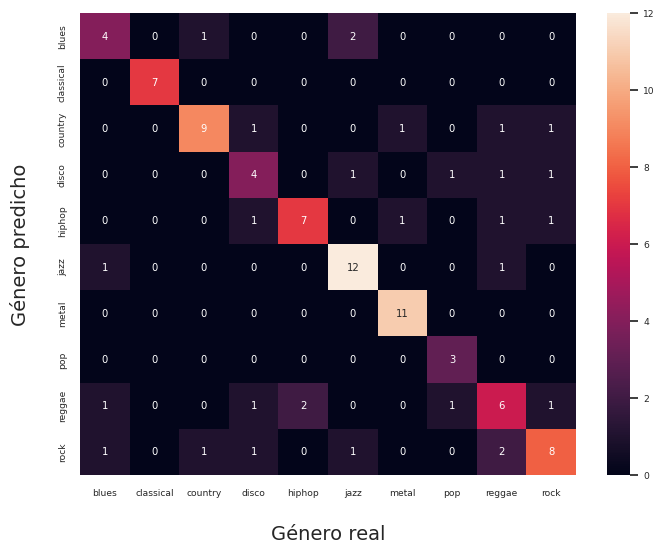

In [15]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val_1, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

# Prueba con un dato de la vida real

---



In [16]:
import librosa
import librosa.feature as Aud

In [41]:
audio_path = '/Audio/Master of Puppets.wav'
x , sr = librosa.load(audio_path, sr=None)
record = {}
print(x.shape, sr, np.mean(x))

(3070097,) 48000 -1.33928825e-05


In [42]:
chroma = Aud.chroma_stft(y=x, sr=sr)
rms = Aud.rms(y=x)
cent = Aud.spectral_centroid(y=x, sr=sr)
spec_bw = Aud.spectral_bandwidth(y=x, sr=sr)
rolloff = Aud.spectral_rolloff(y=x, sr=sr)
zero_cross = Aud.zero_crossing_rate(x)
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
tempo = Aud.tempo(onset_envelope=onset_env, sr=sr)

record['chroma_stft_mean'] = np.mean(chroma)
record['chroma_stft_var'] = np.var(chroma)
record['rms_mean'] = np.mean(rms)
record['rms_var'] = np.var(rms)
record['spectral_centroid_mean'] = np.mean(cent)
record['spectral_centroid_var'] = np.var(cent)
record['spectral_bandwidth_mean'] = np.mean(spec_bw)
record['spectral_bandwidth_var'] = np.var(spec_bw)
record['rolloff_mean'] = np.mean(rolloff)
record['rolloff_var'] = np.var(rolloff)
record['zero_crossing_rate_mean'] = np.mean(zero_cross)
record['zero_crossing_rate_var'] = np.var(zero_cross)
record['tempo'] = tempo

In [43]:
mfccs = Aud.mfcc(y = x, sr = sr)
for i in range(mfccs.shape[0]):
  key_m = 'mfcc' + str(i+1) + '_mean'
  key_v = 'mfcc' + str(i+1) + '_var'
  record[key_m] = np.mean(mfccs[i,:])
  record[key_v] = np.var(mfccs[i,:])

df = pd.DataFrame(record)
df = df.values
print(df.shape)

(1, 53)


In [44]:
scaled_vals = scaler.transform(df)
out_ = music_Regression_1.predict(scaled_vals)
print(out_)

['metal']


# Se exporta el modelo a un archivo

In [47]:
filename = '/finalized_model.sav'
pickle.dump(music_Regression_1, open(filename, 'wb'))

In [50]:
filename = '/scaler_regression.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [49]:
# load the model from disk
loaded_model = pickle.load(open('/finalized_model_regression.sav', 'rb'))
scaled_vals = scaler.transform(X_test)
result = loaded_model.score(scaled_vals, y_test[:,0])
print(result)

0.63


In [51]:
# load the scaler from disk
loaded_scaler = pickle.load(open('/scaler_regression.sav', 'rb'))
scaled_vals = loaded_scaler.transform(X_test)
scaled_vals[:5,:5]

array([[ 1.73141377, -0.95050318, -0.61774448,  0.2542268 ,  1.05215287],
       [ 0.66247135, -0.61475972,  0.74094167, -0.43555777,  0.36726602],
       [-0.01317555,  0.91560303, -0.27003008, -0.02835125,  0.08302017],
       [ 0.6587854 , -0.82982306,  0.98390617,  0.0862291 , -0.34601159],
       [ 0.23025814,  0.44907922,  0.13795656, -0.30689118, -0.64470753]])